# The active wokspace

There is always an active Workspace. When **maelzel.core** is imported a new Workspace is created, which can be retrieved via `getWorkspace`

In [25]:
from maelzel.core import *
from IPython.display import display

w = getWorkspace()
w

Workspace(scorestruct=ScoreStruct(3/4, tempo=96), config={'play.instr': '.piano'}, dynamicCurve=DynamicCurve(shape=expon(0.3), mindb=-60.0, maxdb=0.0))

Alternatively the active workspace can be accessed via the `active` class variable, as `Workspace.active`

In [26]:
w2 = Workspace.active
assert w is w2

The active workspace contains the working environment. The most important attributes encapsulated here are the score structure (`.scorestruct`, an instance of `ScoreStruct`) and the configuration (`.config`, an instance of `CoreConfig`)  


Each new `Workspace` contains a basic `ScoreStruct` (4/4, quarter=60) and a copy of the root config

In [27]:
w.scorestruct

ScoreStruct(3/4, tempo=96)

In [28]:
w.config

19 35


Key,Value,Type,Descr
A4,442,between 10 - 10000,"Freq. of A4. Normal values are between 440-443, but any value can be used"
chordAdjustGain,True,type: bool,"Limit the gain of a chord according to the number of notes, to prevent clipping. Only applied if the notes don't have an individual amplitude"
dynamicCurveDynamics,ppp pp p mp mf f ff fff,type: str,"Possible dynamic steps. A str with all dynamic steps, sorted from soft to loud"
dynamicCurveMaxdb,0,between -160 - 0,Amplitude in dB corresponding to the loudest dynamic
dynamicCurveMindb,-60,between -160 - 0,Amplitude in dB corresponding to the softest dynamic
dynamicCurveShape,expon(0.3),type: str,"Shape used for the converting dynamics to amplitudes. Normally an exponential curve, given as 'expon(exp)', where exp is the exponent used. exp < 1 results in more resolution for soft dynamics"
enharmonic.horizontalWeight,1,type: int,Weight of the horizontal dimension (note sequences) when evaluating an enharmonic variant
enharmonic.verticalWeight,0.5,type: float,Weight of the vertical dimension (chords within a voice) when evaluating an enharmonic variant
fixStringNotenames,False,type: bool,True: pitches given as notenames are fixed at the spelling given. False: they are respelled for better readability within the context. Pitches given as midi notes or frequencies are always respelled
htmlTheme,light,"{dark, light}",Theme used when displaying html inside jupyter


## Modifying the active Workspace vs creating a new Workspace

If you are not planning on working on multiple scores simultaneously, the most convenient way to setup your own score structure or to customize the configuration is to **modify the active workspace**

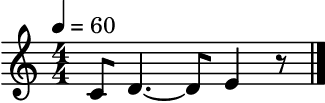

OfflineRenderer(sr=44100)
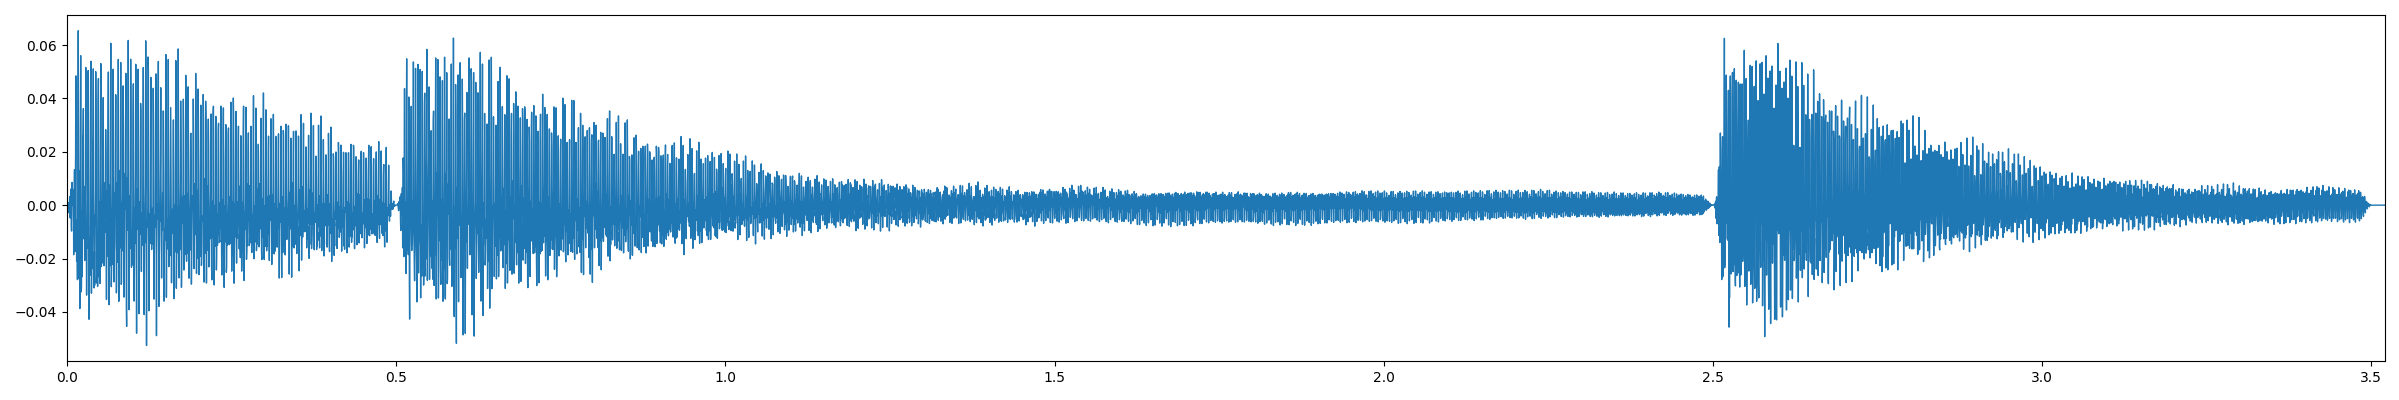

In [7]:
# Reset the scorestruct to the default
w.setScoreStruct()

chain = Chain(r"""
    4C:0.5
    4D:2
    4E:1
""")
chain.show()
chain.rec(nchnls=1)

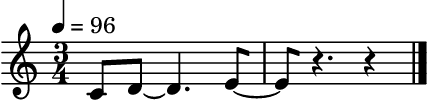

OfflineRenderer(sr=44100)
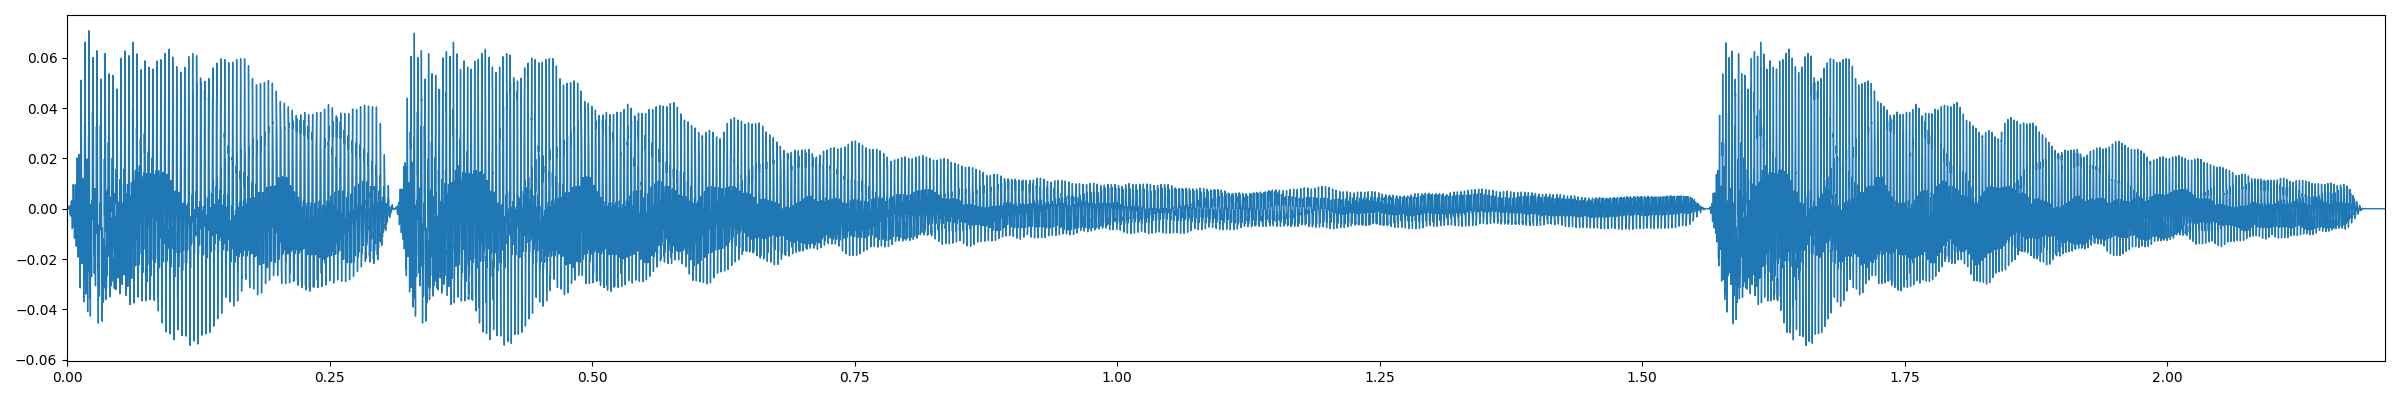

In [9]:
w.setScoreStruct((3, 4), tempo=96)
chain.show()
chain.rec(nchnls=1)


Or one can create an independent Workspace with its own scorestruct:

Chain([4C:1/2♩, 4D:2♩, 4E:1♩])
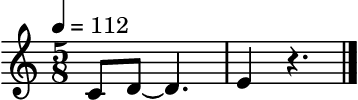

In [11]:
w = Workspace(scorestruct=ScoreStruct((5, 8), tempo=112), active=True)
chain

Deactivating the active Workspace activates the previous workspace (there should always be an active Workspace)

Chain([4C:1/2♩, 4D:2♩, 4E:1♩])
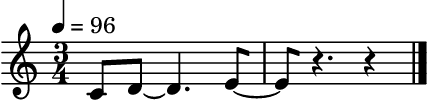

In [12]:
w.deactivate()
chain

As a side note, if you just want to test something under a different scorestruct, you can use a `ScoreStruct` as a **context manager**. This clones the active Workspace with the given `ScoreStruct` and activates this newly created Workspace, to deactivate it when to context is exited.

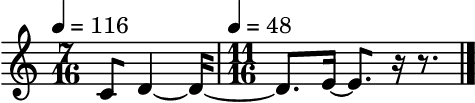

OfflineRenderer(sr=44100)
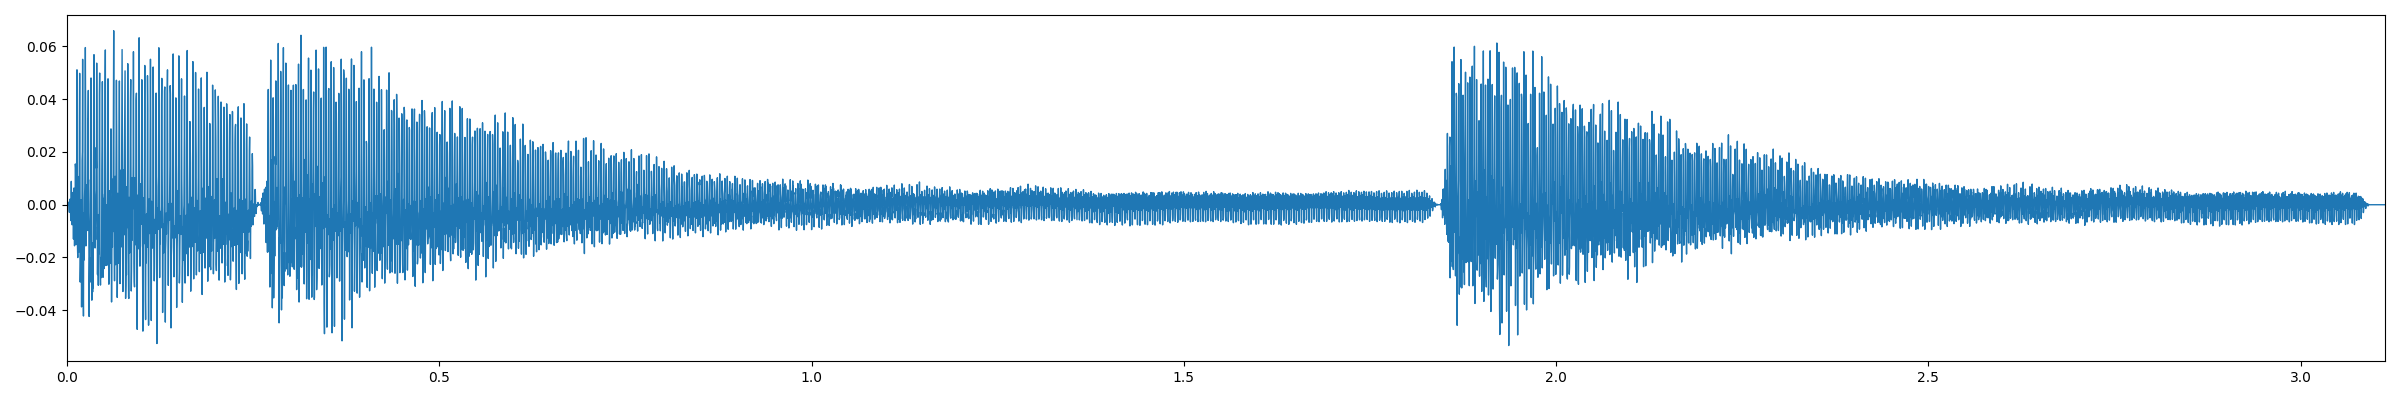

In [14]:
with ScoreStruct(r'''
    7/16, 116
    11/16, 48
'''):
    chain.show()
    display(chain.rec(nchnls=1))


The same is valid for the configuration. You can modify the active Workspace by changing its config, either via `setConfig` or by directly assigning to `.config`:

Chain([4C+15:1♩, 4E♭-19:1/2♩, 3B+:3/2♩])
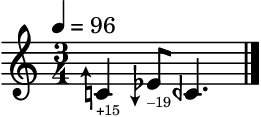

In [15]:
chain = Chain(r'''
  C4+15:1
  4Eb-19:0.5
  3B+:1.5
''')
chain

Chain([4C+15:1♩, 4E♭-19:1/2♩, 3B+:3/2♩])
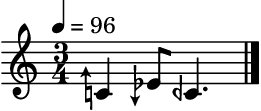

In [19]:
config = CoreConfig(active=True)
config['show.cents'] = False
chain

A config can also be used as a context manager:

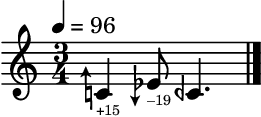

In [23]:
with CoreConfig({'show.flagStyle': 'normal'}):
    chain.show()

Reset the config to the root config

Chain([4C+15:1♩, 4E♭-19:1/2♩, 3B+:3/2♩])
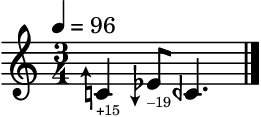

In [24]:
CoreConfig.root().activate()
chain